## Analysis of South Bend Police Department Recruitment

<ol>
<li>What methods is the department using to recruit?</li>
<li>Where are most candidates dropping off in the recruitment process?</li>
<li>Over the three years of available data, how have the dropoff amounts changed?</li>
<li>Can I conclude that the South Bend PD has made a good faith effort to promote diversity?</li>
</ol>

In [565]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [371]:
df = pd.read_csv('SBPD_Recruitment_Data.csv')

In [448]:
df.head()

,Applicant_ID,Applicant_City,Applicant_State__Region,Applicant_Zip_Postal_Code,Position_Title,Req_Number,Location,Division,Applicant_Status,Last_Hiring_Stage,Source,Applicant_Apply_Method,Entry_Date,Ethnicity,Gender,EEO_Veteran_Status__Pre_Offer_,Cycle,ObjectId,Year
0,63217447,Mill Creek,IN,46365,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Word of Mouth,Mobile,2018-10-29T23:43:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,1,2019
1,51041583,Walkerton,IN,46574,Police Officer Recruit,PUB-17-00002,South Bend Police Department,Police,Hired,"Passed Polygraph, Medical, Psych, and Hired",Job/Career Fair,Web,2017-05-08T15:05:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Fall 2017,2,2017
2,63244731,Bedford,IN,47421,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Other,Web,2018-10-31T06:36:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,3,2019
3,63326694,Mishawaka,IN,46544,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Company Website,Web,2018-11-05T13:28:00.000Z,White (Not Hispanic or Latino),Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,4,2019
4,50555166,Niles,MI,49120,Police Officer Recruit,PUB-18-00005,South Bend Police Department,Police,AP - Incomplete,Disqualified/Withdrew/Incomplete,Internet/Job Board,Mobile,2018-11-06T14:00:00.000Z,Black or African American (Not Hispanic or Lat...,Male,I IDENTIFY AS ONE OR MORE OF THE CLASSIFICATIO...,Summer 2019,5,2019


In [447]:
# assign hiring cycles into years

# the below doesn't work
# this article helped me figure it out https://www.dataquest.io/blog/settingwithcopywarning/
# df[df['Cycle'].str.contains('2017')].loc[:,'Year'] = 2017

# this worked
df.loc[df['Cycle'].str.contains('2017'), 'Year'] = 2017
df.loc[df['Cycle'].str.contains('2018'), 'Year'] = 2018
df.loc[df['Cycle'].str.contains('2019'), 'Year'] = 2019
# change year to int data type
df['Year'] = df['Year'].astype(int)

## Ethnicity 

In [166]:
# how many applicants do not provide any ethnicity?
np.sum(df['Ethnicity'].isna())

375

In [169]:
# add "No Response" in place of NaN so that quantity will be captured in pie chart

df.loc[df['Ethnicity'].isna(), 'Ethnicity'] = 'No Response'

In [170]:
# how is ethnicity distributed by applicant?
df['Ethnicity'].value_counts()

White (Not Hispanic or Latino)                                        955
No Response                                                           375
Black or African American (Not Hispanic or Latino)                    280
Hispanic or Latino                                                    128
Two or More Races (Not Hispanic or Latino)                             62
Prefer not to answer                                                   23
Asian (Not Hispanic or Latino)                                         20
American Indian or Alaska Native (Not Hispanic or Latino)               7
Native Hawaiian or Other Pacific Islander (Not Hispanic or Latino)      2
Unknown                                                                 1
Name: Ethnicity, dtype: int64

In [171]:
# copy series and translate into df
ethnicity_counts = df['Ethnicity'].value_counts().reset_index().copy()

In [172]:
# summarize all ethnicities other than the top 3
ethnicity_counts = ethnicity_counts.iloc[0:4].append(ethnicity_counts.iloc[4:10].sum(), ignore_index=True)
ethnicity_counts.iloc[4,0] = 'Other'

In [173]:
# verify everything looks as it should
ethnicity_counts

,index,Ethnicity
0,White (Not Hispanic or Latino),955
1,No Response,375
2,Black or African American (Not Hispanic or Lat...,280
3,Hispanic or Latino,128
4,Other,115


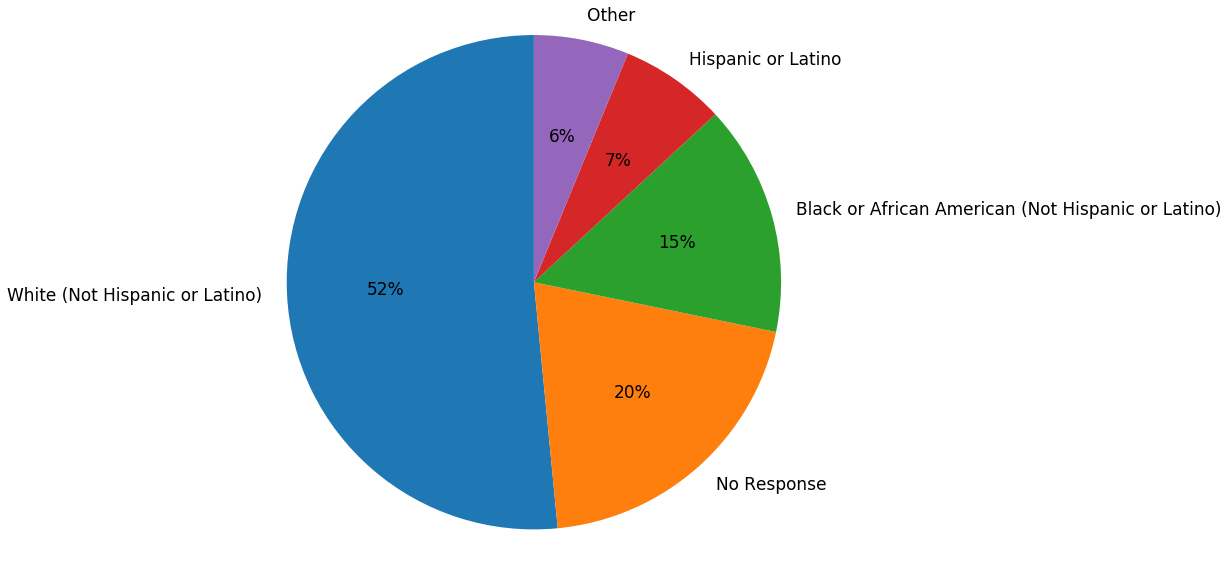

In [175]:
fig1, ax1 = plt.subplots(figsize=(15,8))

ax1.pie(ethnicity_counts['Ethnicity'], 
        labels=ethnicity_counts['index'], 
        startangle=90, textprops={'fontsize': 17}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()

plt.savefig("visualizations/ethnicity of applicant.png", dpi=300, bbox_inches='tight')

## Applicant Status

In [9]:
# how are applicant statuses distributed?
# this seems to be the most fined grained way to see 
# where candidates are droping off in the process

df['Applicant_Status'].value_counts()

AP - Incomplete                          1022
HM - No Show Fitness (Police)             485
HM - Reviewed Disqualified (Police)        62
HR - Withdrew                              51
HM - Written Exam Fail (Police)            26
HM - Fitness Test Info Sent (Police)       26
HM - Fitness Test Fail (Police)            24
Hired                                      24
HM - Personal Interview Fail (Police)      23
HM - Oral Board Fail (Police)              21
AP - Qualified (emailed)                   17
HM - Background Fail (Police)              15
OF - Withdrawn                             13
AP - Not Qualified                         12
HM - No Show Written (Police)              11
HM - Polygraph Fail (Police)               11
HR - Unable to contact                      3
INTV - Withdrew                             3
HM - Personal Interview Pass (Police)       2
HM - Written Exam Pass (Police)             1
VF - Disqualified                           1
Name: Applicant_Status, dtype: int

In [109]:
# copy series and translate into df
applicant_status_count = df['Applicant_Status'].value_counts().reset_index().copy()

In [111]:
applicant_status_count.iloc[0:4]

,index,Applicant_Status
0,AP - Incomplete,1022
1,HM - No Show Fitness (Police),485
2,HM - Reviewed Disqualified (Police),62
3,HR - Withdrew,51


In [116]:
# summarize all ethnicities other than the top 4
applicant_status_count = applicant_status_count.iloc[0:4].append(applicant_status_count.iloc[4:20].sum(), ignore_index=True)

applicant_status_count.iloc[4,0] = 'Other'

In [117]:
ethnicity_counts

,index,Applicant_Status
0,AP - Incomplete,1022
1,HM - No Show Fitness (Police),485
2,HM - Reviewed Disqualified (Police),62
3,HR - Withdrew,51
4,Other,232


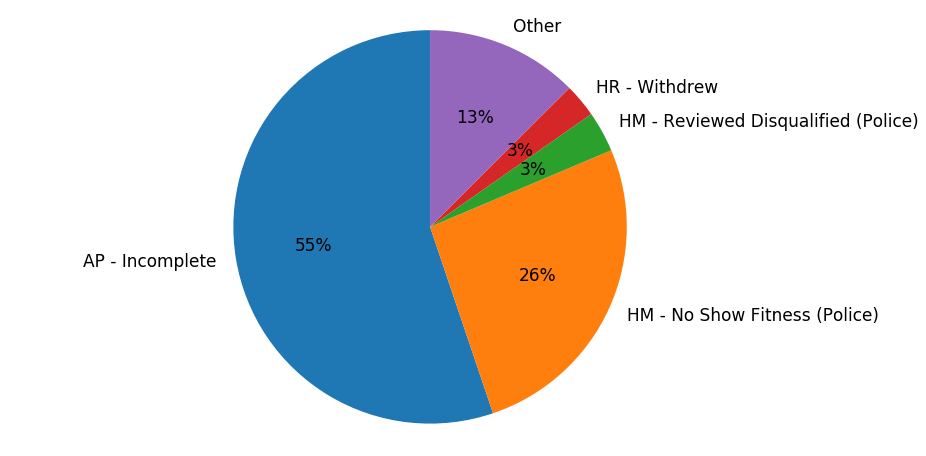

In [132]:
fig1, ax1 = plt.subplots(figsize=(15,8))

ax1.pie(applicant_status_count['Applicant_Status'], 
        labels=applicant_status_count['index'], 
        startangle=90, textprops={'fontsize': 17}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("visualizations/applicant status.png", dpi=300)

In [449]:
# how do applicant status distributions differ by ethnicity?
app_status_by_ethnicity = df[['Ethnicity', 'Applicant_Status', 'Year']].copy()

In [450]:
#verify I have the data I need
app_status_by_ethnicity.head()

,Ethnicity,Applicant_Status,Year
0,White (Not Hispanic or Latino),AP - Incomplete,2019
1,White (Not Hispanic or Latino),Hired,2017
2,White (Not Hispanic or Latino),AP - Incomplete,2019
3,White (Not Hispanic or Latino),AP - Incomplete,2019
4,Black or African American (Not Hispanic or Lat...,AP - Incomplete,2019


In [451]:
app_status_by_ethnicity['Applicant_Status'].value_counts().head(4)

AP - Incomplete                        1022
HM - No Show Fitness (Police)           485
HM - Reviewed Disqualified (Police)      62
HR - Withdrew                            51
Name: Applicant_Status, dtype: int64

In [454]:
# eliminate candidates with no ethnicity provided
app_status_by_ethnicity = app_status_by_ethnicity.loc[app_status_by_ethnicity['Ethnicity'] != 'No Response']

# eliminate candidates other than the top 3 ethnicities
app_status_by_ethnicity = app_status_by_ethnicity[app_status_by_ethnicity['Ethnicity'].isin(
    app_status_by_ethnicity['Ethnicity'].value_counts().head(3).index)]

# eliminate candidates which have other than the top 4 statuses
app_status_by_ethnicity = app_status_by_ethnicity[app_status_by_ethnicity['Applicant_Status'].isin(
    app_status_by_ethnicity['Applicant_Status'].value_counts().head(4).index)]

In [501]:
# compute percent of each status per ethnicity
ethnicity_group = app_status_by_ethnicity.groupby(['Ethnicity', 'Applicant_Status'])['Ethnicity'].agg(['count'])

ethnicity_status_group = ethnicity_group.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index()

In [502]:
ethnicity_group

count
Ethnicity                                          Applicant_Status                          
Black or African American (Not Hispanic or Latino) AP - Incomplete                        141
                                                   HM - No Show Fitness (Police)           91
                                                   HM - Reviewed Disqualified (Police)     10
                                                   HR - Withdrew                            3
Hispanic or Latino                                 AP - Incomplete                         43
                                                   HM - No Show Fitness (Police)           49
                                                   HM - Reviewed Disqualified (Police)     11
                                                   HR - Withdrew                            4
White (Not Hispanic or Latino)                     AP - Incomplete                        436
                                                   HM - No Show Fitness (Police)          303
                                                   HM - Reviewed Disqualified (Police)     30
                                                   HR - Withdrew                           35

In [503]:
ethnicity_status_group

,Ethnicity,Applicant_Status,count
0,Black or African American (Not Hispanic or Lat...,AP - Incomplete,57.551020
1,Black or African American (Not Hispanic or Lat...,HM - No Show Fitness (Police),37.142857
2,Black or African American (Not Hispanic or Lat...,HM - Reviewed Disqualified (Police),4.081633
3,Black or African American (Not Hispanic or Lat...,HR - Withdrew,1.224490
4,Hispanic or Latino,AP - Incomplete,40.186916
5,Hispanic or Latino,HM - No Show Fitness (Police),45.794393
6,Hispanic or Latino,HM - Reviewed Disqualified (Police),10.280374
7,Hispanic or Latino,HR - Withdrew,3.738318
8,White (Not Hispanic or Latino),AP - Incomplete,54.228856
9,White (Not Hispanic or Latino),HM - No Show Fitness (Police),37.686567


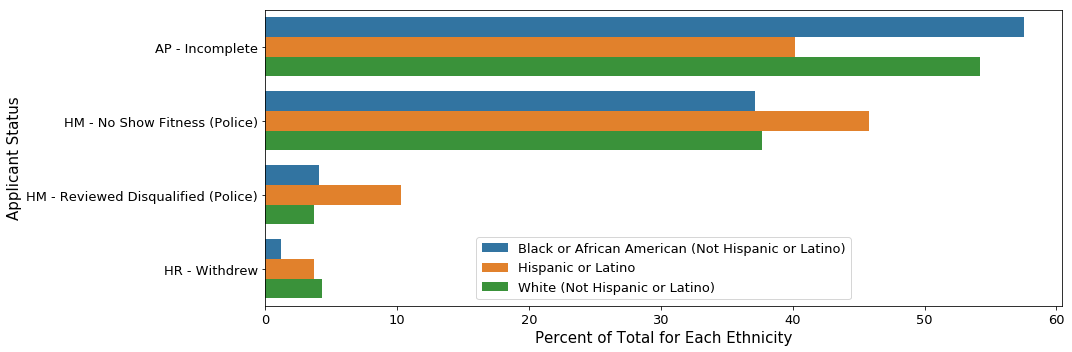

In [504]:
# fig1, ax1 = plt.subplots(figsize=(15,8))

plt.subplots(figsize=(15,5))

sns.barplot(x=ethnicity_status_group.loc[:,'count'], \
             y=ethnicity_status_group.loc[:,'Applicant_Status'], \
             hue=ethnicity_status_group.loc[:,'Ethnicity'], \
             data=ethnicity_status_group)

# plt.title('Oldest Business License Name Tokens vs. Newest Business License Name Tokens',fontsize=20)
plt.ylabel('Applicant Status',fontsize=15)
plt.xlabel('Percent of Total for Each Ethnicity',fontsize=15)
plt.tick_params(labelsize=13)
plt.legend(loc='lower center',fontsize=13)

plt.tight_layout()
# plt.savefig('visualizations/applicant_status_by_ethnicity.png', dpi=300)

### Compute percent of each status per ethnicity per year

In [535]:
ethnicity_status_year = app_status_by_ethnicity.groupby(['Ethnicity', 'Year', 'Applicant_Status'])['Ethnicity'].agg(['count'])

# groupby Ethnicity & Year, then compute percent
ethnicity_status_year_percent = ethnicity_status_year.groupby(level=[0, 1]).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index().rename(columns={'count': 'Percent'})

In [536]:
ethnicity_status_year.head()

count
Ethnicity                                          Year Applicant_Status                          
Black or African American (Not Hispanic or Latino) 2017 AP - Incomplete                         25
                                                        HM - No Show Fitness (Police)           24
                                                        HM - Reviewed Disqualified (Police)      2
                                                        HR - Withdrew                            2
                                                   2018 AP - Incomplete                         70

In [634]:
ethnicity_status_year_percent.head()

,Ethnicity,Year,Applicant_Status,Percent
0,Black or African American (Not Hispanic or Lat...,2017,AP - Incomplete,47.169811
1,Black or African American (Not Hispanic or Lat...,2017,HM - No Show Fitness (Police),45.283019
2,Black or African American (Not Hispanic or Lat...,2017,HM - Reviewed Disqualified (Police),3.773585
3,Black or African American (Not Hispanic or Lat...,2017,HR - Withdrew,3.773585
4,Black or African American (Not Hispanic or Lat...,2018,AP - Incomplete,60.869565


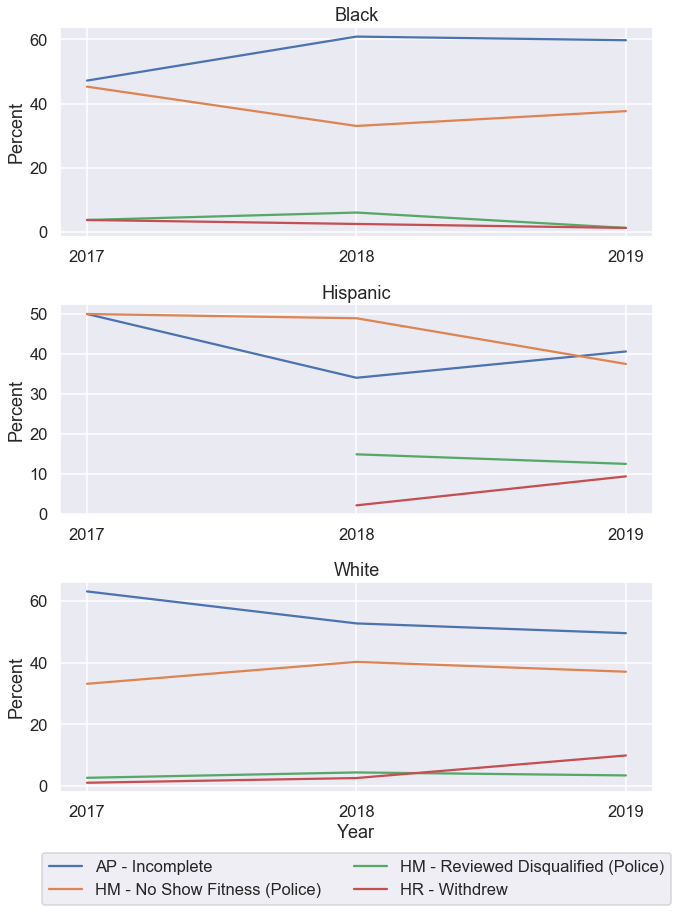

In [798]:
fig, axes = plt.subplots(nrows=3, ncols=1)
sns.set(rc={'figure.figsize':(10,13)})
sns.set_context('talk')

black = sns.lineplot(x="Year", \
             y="Percent", 
             hue="Applicant_Status",
             data=ethnicity_status_year_percent[ethnicity_status_year_percent['Ethnicity'].str.contains('Black')],
             ax=axes[0],
            legend=False)

black.xaxis.set_major_locator(ticker.MultipleLocator())
black.set_title('Black')
black.set_xlabel('')

hispanic = sns.lineplot(x="Year", \
             y="Percent", 
             hue="Applicant_Status",
             data=ethnicity_status_year_percent[ethnicity_status_year_percent['Ethnicity'] == 'Hispanic or Latino'],
             ax=axes[1],
            legend=False)

hispanic.xaxis.set_major_locator(ticker.MultipleLocator())
hispanic.set_title('Hispanic')
hispanic.set_xlabel('')

white = sns.lineplot(x="Year", \
             y="Percent", 
             hue="Applicant_Status",
             data=ethnicity_status_year_percent[ethnicity_status_year_percent['Ethnicity'].str.contains('White')],
             ax=axes[2],
            legend='full')

white.xaxis.set_major_locator(ticker.MultipleLocator())
white.set_title('White')

handles, labels = white.get_legend_handles_labels()
white.legend(handles=handles[1:], labels=labels[1:], loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=2)

plt.tight_layout()
plt.savefig('visualizations/applicant_status_by_ethnicity_over_time.png')

### How has the count of applications by ethnicities changed over the years?

In [636]:
ethnicity_count_year = app_status_by_ethnicity.groupby(['Ethnicity', 'Year'])['Ethnicity'].agg(['count'])

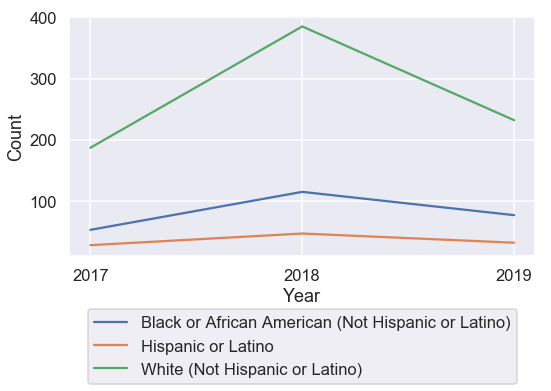

In [752]:
fig, axes = plt.subplots()
sns.set(rc={'figure.figsize':(8,6)})
sns.set_context('talk')

sns.lineplot(x="Year", \
             y="count", 
             hue="Ethnicity",
             data=ethnicity_count_year.reset_index())

axes.xaxis.set_major_locator(ticker.MultipleLocator())
axes.set_ylabel('Count')

handles, labels = axes.get_legend_handles_labels()
# handles and labels kwargs necessary here to remove label from legend
axes.legend(handles=handles[1:], labels=labels[1:], loc='upper center', bbox_to_anchor=(0.5, -.185), ncol=1)
plt.tight_layout()

plt.savefig('visualizations/ethnicity_count_change_over_time.png')

### How has the means of advertising the police officer job changed over time?

In [704]:
ad_method = df[['Ethnicity', 'Year', 'Source', 'Applicant_Apply_Method']].copy()

In [707]:
# lump together all sources other than the top 6
ad_method.loc[ad_method['Source'].isin(ad_method['Source'].value_counts().iloc[6:11].index),'Source'] = 'Other'

In [718]:
ad_method = ad_method[ad_method['Ethnicity'].isin(app_status_by_ethnicity['Ethnicity'].value_counts().head(3).index)]

In [720]:
ad_method.groupby(['Year', 'Source'])['Source'].agg(['count']).reset_index().head()

,Year,Source,count
0,2017,Company Website,35
1,2017,Employee Referral,18
2,2017,Internet/Job Board,193
3,2017,Job/Career Fair,5
4,2017,Other,57


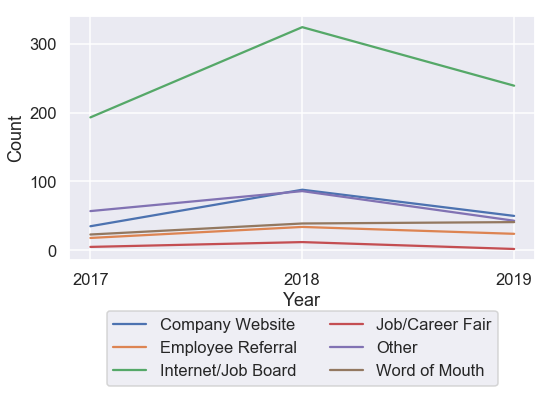

In [753]:
fig, axes = plt.subplots()
sns.set(rc={'figure.figsize':(8,5)})
sns.set_context('talk')

sns.lineplot(x="Year", \
             y="count", 
             hue="Source",
             data=ad_method.groupby(['Year', 'Source'])['Source'].agg(['count']).reset_index())

axes.xaxis.set_major_locator(ticker.MultipleLocator())
axes.set_ylabel('Count')

handles, labels = axes.get_legend_handles_labels()
# handles and labels kwargs necessary here to remove label from legend
axes.legend(handles=handles[1:], labels=labels[1:], loc='upper center', bbox_to_anchor=(0.5, -.175), ncol=2)
plt.tight_layout()

plt.savefig('visualizations/add_method_over_time.png')

In [733]:
ad_method_grouped = ad_method.groupby(['Ethnicity','Year', 'Source'])['Source'].agg(['count']).reset_index()

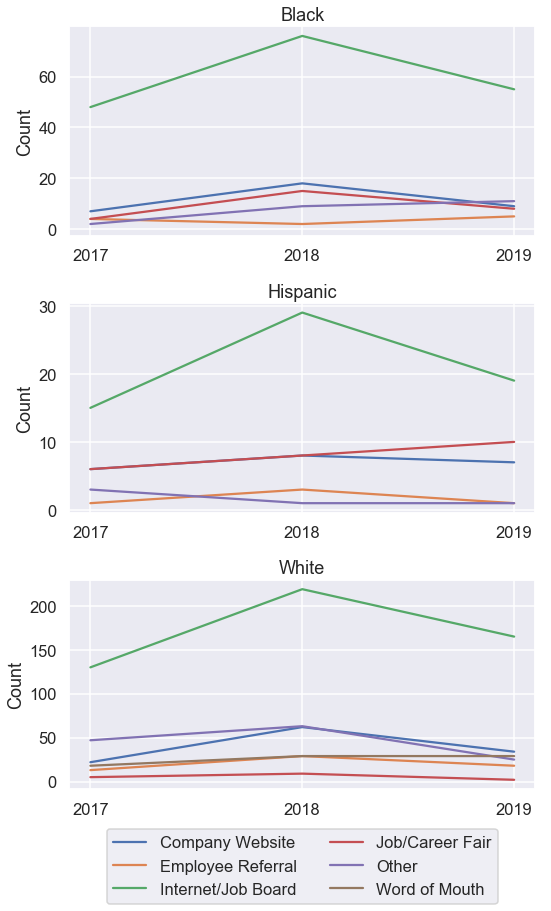

In [796]:
fig, axes = plt.subplots(nrows=3, ncols=1)
sns.set(rc={'figure.figsize':(8,13)})
sns.set_context('talk')

black = sns.lineplot(x="Year", \
             y="count", 
             hue="Source",
             data=ad_method_grouped[ad_method_grouped['Ethnicity'].str.contains('Black')],
             ax=axes[0],
            legend=False)
black.set_ylabel('Count')


black.xaxis.set_major_locator(ticker.MultipleLocator())
black.set_title('Black')
black.set_xlabel('')

hispanic = sns.lineplot(x="Year", \
             y="count", 
             hue="Source",
             data=ad_method_grouped[ad_method_grouped['Ethnicity'] == 'Hispanic or Latino'],
             ax=axes[1],
             legend=False)
hispanic.set_ylabel('Count')

hispanic.xaxis.set_major_locator(ticker.MultipleLocator())
hispanic.set_title('Hispanic')
hispanic.set_xlabel('')

white = sns.lineplot(x="Year", \
             y="count", 
             hue="Source",
             data=ad_method_grouped[ad_method_grouped['Ethnicity'].str.contains('White')],
             ax=axes[2],
             legend='full')
white.set_ylabel('Count')

white.xaxis.set_major_locator(ticker.MultipleLocator())
white.set_title('White')
white.set_xlabel('')

handles, labels = white.get_legend_handles_labels()
white.legend(handles=handles[1:], labels=labels[1:], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

plt.tight_layout()
plt.savefig('visualizations/add_method_by_ethnicity_over_time.png')

## Applicant Gender

In [149]:
df['Gender'].value_counts()

Male                    1248
Female                   226
Prefer not to answer       4
Name: Gender, dtype: int64

In [146]:
# exclude 'Prefer not to answer since they make up such a small amount'
df['Gender'].value_counts().iloc[0:2].values

array([1248,  226], dtype=int64)

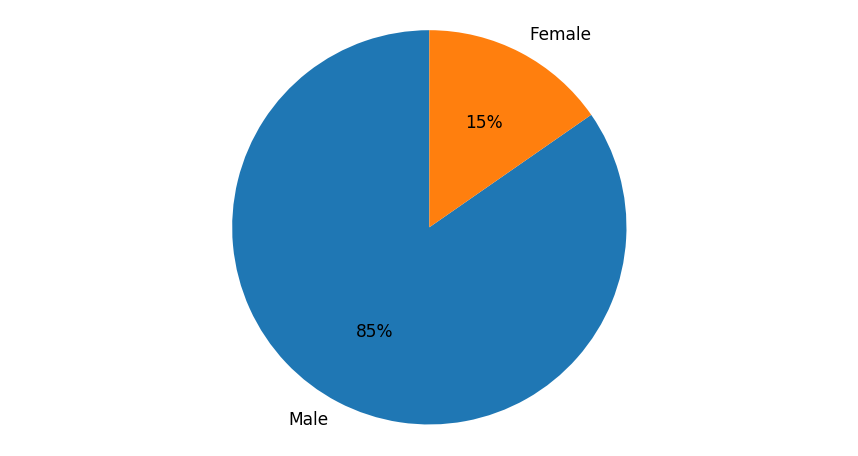

In [148]:
fig1, ax1 = plt.subplots(figsize=(15,8))

ax1.pie(df['Gender'].value_counts().iloc[0:2].values, 
        labels=df['Gender'].value_counts().iloc[0:2].index, 
        startangle=90, textprops={'fontsize': 17}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("visualizations/applicant gender.png")

In [47]:
# how does applicant status differ from last hiring status?
# at the end of the hiring season, shouldn't everyone be in either 'hired'
# category or 'disqualified/withdrew/incomplete' category?
# I'm not sure this metric is that helpful

df['Last_Hiring_Stage'].value_counts()

Disqualified/Withdrew/Incomplete               1090
Submitted Application                           605
Completed Written Test                           26
Took Physical Test                               24
Passed Polygraph, Medical, Psych, and Hired      24
Completed Personal                               23
Completed Interview                              21
Passed Interview                                 15
Passed Physical Test                             11
Passed Background                                11
Passed Personal                                   2
Passed Written Test                               1
Name: Last_Hiring_Stage, dtype: int64

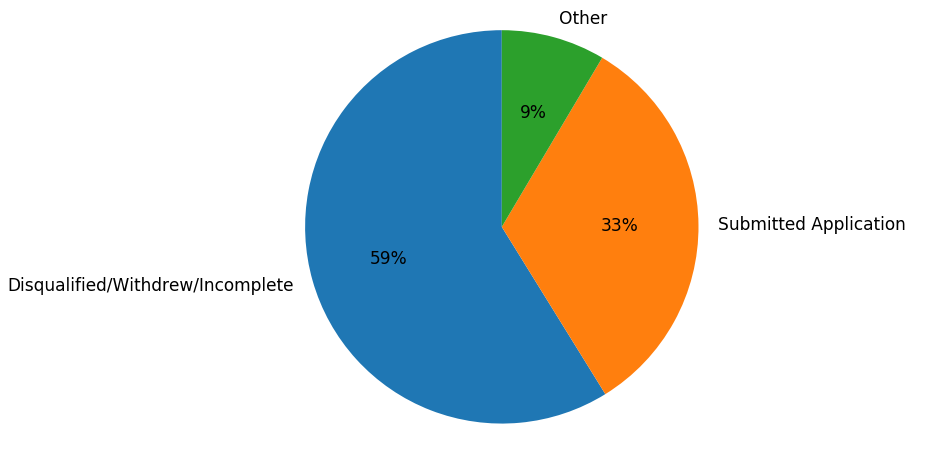

In [176]:
fig1, ax1 = plt.subplots(figsize=(15,8))

amounts = [last_hiring_stage.iloc[0], last_hiring_stage.iloc[1], last_hiring_stage.iloc[2:20].sum()]
labels = ['Disqualified/Withdrew/Incomplete', 'Submitted Application', 'Other' ]

ax1.pie(amounts, labels=labels, 
        startangle=90, textprops={'fontsize': 17}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("visualizations/last hiring stage.png")

In [12]:
# for applicants that have been hired, what are their ethnicities?
df[df['Applicant_Status'] == 'Hired']['Ethnicity'].value_counts()

White (Not Hispanic or Latino)                        20
Black or African American (Not Hispanic or Latino)     2
Hispanic or Latino                                     1
Name: Ethnicity, dtype: int64

In [10]:
# how is the means of getting the word out distributed by channels?
df['Source'].value_counts()

# based on these results it seems that South Bend has been proactive to advertise the job in a targeted way

Internet/Job Board        1158
Company Website            188
Other                      161
Word of Mouth              116
Employee Referral           85
Job/Career Fair             21
College/University          16
Radio/TV                    13
Agency                      10
Newspaper                    7
Community Organization       2
Name: Source, dtype: int64

In [11]:
# how are applicant methods distributed
df['Applicant_Apply_Method'].value_counts()

# based on these results South Bend has been proactive at making it easier to apply on a phone,
# which is going to appeal more to younger applicants

Mobile    954
Web       817
ATS        82
Name: Applicant_Apply_Method, dtype: int64

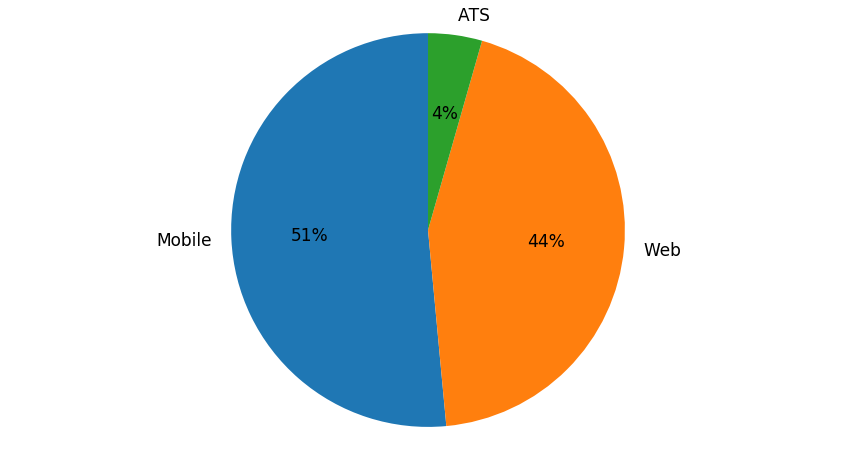

In [198]:
fig1, ax1 = plt.subplots(figsize=(15,8))

ax1.pie(df['Applicant_Apply_Method'].value_counts().values, 
        labels=df['Applicant_Apply_Method'].value_counts().index, 
        startangle=90, textprops={'fontsize': 17}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("visualizations/applicant apply method.png", dpi=300)

## South Bend Census/Police Force Data

In [188]:
census_data = pd.DataFrame({
    'Ethnicity':['White', 'Black', 'Hispanic'],
    'Count':[55, 26.5, 14.7]
})

In [190]:
census_data['Count'].sum()

96.2

In [191]:
census_data

,Ethnicity,Count
0,White,55.0
1,Black,26.5
2,Hispanic,14.7


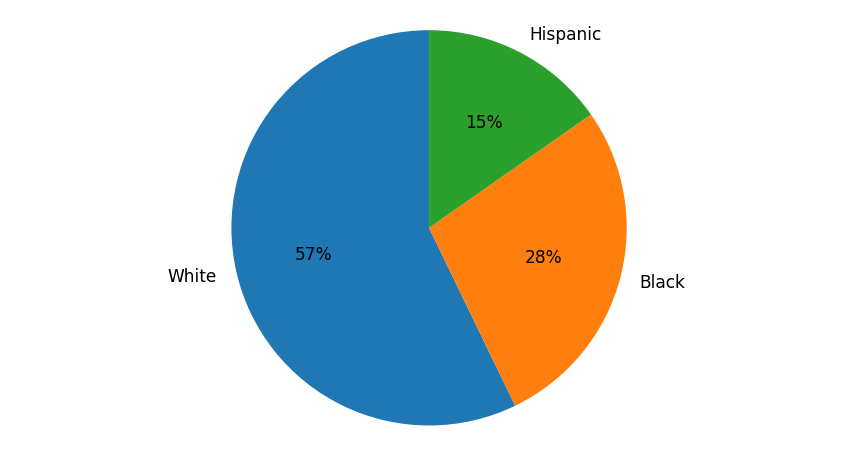

In [197]:
fig1, ax1 = plt.subplots(figsize=(15,8))

ax1.pie(census_data['Count'], 
        labels=census_data['Ethnicity'], 
        startangle=90, textprops={'fontsize': 17}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("visualizations/south_bend_ethnic_composition.png", dpi=300)

In [179]:
police_force_makeup = pd.DataFrame({
    'Ethnicity':['White', 'Black', 'Hispanic'],
    'Percent':[88, 5, 5]
})

In [180]:
police_force_makeup

,Ethnicity,Percent
0,White,88
1,Black,5
2,Hispanic,5


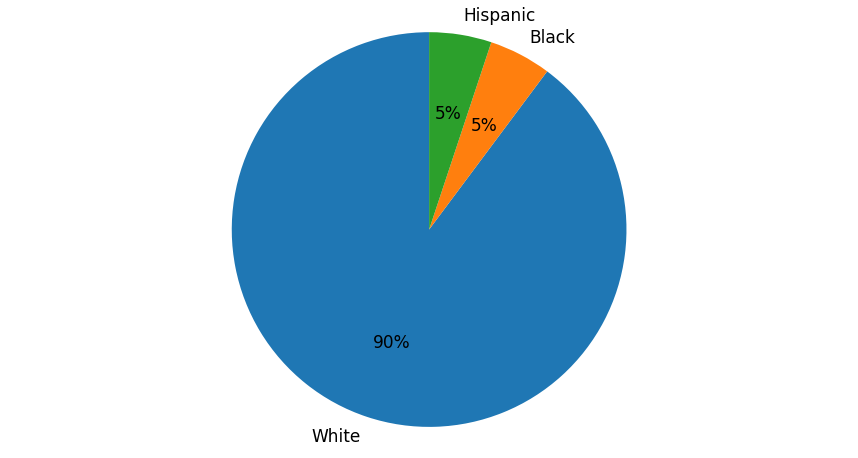

In [196]:
fig1, ax1 = plt.subplots(figsize=(15,8))

ax1.pie(police_force_makeup['Percent'], 
        labels=police_force_makeup['Ethnicity'], 
        startangle=90, textprops={'fontsize': 17}, autopct='%1.f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("visualizations/south_bend_pd_composition.png", dpi=300)